# Keras

## 1.개요
   - 파이썬으로 구현된 쉽고 간결한 딥러닝 라이브러리
   - 프랑소와 숄레가 2015년 3월에 발표
   - 내부적으로는 텐서플로우 엔진이 구동되지만 직관적인 API로 쉽게 딥러닝 실험을 할 수 있도록 지원
   - http://keras.io/ko
   - 참고 : https://3months.tistory.com/54

## 2. 주요특징
    - 모듈화 : 독립적인 모듈들을 조합하여 구현
    - 최소주의 : 각 모듈을 짮고 간결
    - 쉬운 확장성 : 클래스나 함수로 모듈을 쉽게 추가할 수 있다.
    - 파이썬 기반 : 별도의 설정이 필요없다.
    

## 3. 설치
     - keras는 tensorflow설치한 버전이랑 맞아야 한다. 그냥
     - pip install keras로 설치하면 최신버전이 깔리는데 tensorflow는 1.대 버전이므로 keras도 거기에 맞춰서 설치
     - pip install keras==2.3.1      -> tensorflow 1.대에서 돌아가는 keras

## 4. API
     - 1. 준비
             Sequential()
             
     - 2. 계층 설정
             Dense()
             
     - 3. 컴파일
             complie()
     
     - 4. 학습(훈련)
             fit()
             
     - 5. 평가
             evaluate()
             
     - 6. 예측        
             predict()

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib as mpl


import matplotlib.font_manager as fm            # 폰트 지정방법
font_name=fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()     
plt.rc('font',family=font_name)


mpl.rcParams['axes.unicode_minus']=False

from sklearn.model_selection import train_test_split

# pip install mglearn
import mglearn
from numpy import linalg




from sklearn.linear_model import LogisticRegression    # 회귀알고리즘
from sklearn.svm import LinearSVC                      # 회귀알고리즘


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report




# 케라스 import
import keras
print(keras.__version__)

from keras.models import Sequential,load_model
from keras.layers.core import Dense
from keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.callbacks import EarlyStopping



Using TensorFlow backend.


2.3.1


### 단순선형회귀

In [12]:
# 데이터준비

# train이면 입력값
#x_train = tf.placeholder(tf.float32,shape=[5])    # 어떤 데이터가 들어올지 모르면 placeholder 이용
#y_train = tf.placeholder(tf.float32,shape=[5])


x_train = tf.placeholder(tf.float32,shape=[None])    # 어떤 데이터가 들어올지 모르면 placeholder 이용
y_train = tf.placeholder(tf.float32,shape=[None])



# 가설준비 -> Wx+b
W = tf.Variable(tf.random_normal([1]),dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]),dtype=tf.float32)

hypot=W*x_train+b


# 비용함수(손실함수)   내가 얼마나 틀렸는지 알아야 보완할 수 있다. 
cost = tf.reduce_mean(tf.square(hypot-y_train))               # square는 제곱을 해주는 함수
                                                              # hypot-y 제곱 합의 평균
    
    
    

# 최저 비용학습을 위한 경사 하강 알고리즘(Gradient Descent)    

train=tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
    
    
    
    
#---------------텐서플로우의 그래프작성완료----------------------------------



sess=tf.Session()
sess.run(tf.global_variables_initializer())



for step in range(2000):
    _,c,w,b1 = sess.run([train,cost,W,b],feed_dict={x_train:[1,2,3,4,5],
                                               y_train:[2.1,3.1,4.1,5.1,6.1]})
    
    if step % 500 == 0:
        print(step,c,w,b1)
        
        
        
# Testing
print(sess.run(hypot,feed_dict={x_train:[27]}))
print(sess.run(hypot,feed_dict={x_train:[2.5,3.7]}))
sess.close()        

0 4.033077 [1.8905183] [-0.570227]
500 0.019643575 [1.0906855] [0.7725966]
1000 0.0006643516 [1.0166773] [1.0397897]
1500 2.24692e-05 [1.003067] [1.088927]
[28.113241]
[3.5993714 4.800051 ]


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
5/5 [==============================] - 0s 9ms/step - loss: 26.5401 - mae: 4.8405
Epoch 2/1000
5/5 [==============================] - 0s 198us/step - loss: 25.1758 - mae: 4.7140
Epoch 3/1000
5/5 [==============================] - 0s 195us/step - loss: 24.2206 - mae: 4.6234
Epoch 4/1000
5/5 [==============================] - 0s 200us/step - loss: 23.4411 - mae: 4.5482
Epoch 5/1000
5/5 [==============================] - 0s 199us/step - loss: 22.7638 - mae: 4.4817
Epoch 6/1000
5/5 [==============================] - 0s 199us/step - loss: 22.1548 - mae: 4.4211
Epoch 7/1000
5/5 [==============================] - 0s 215us/step - loss: 21.59

Epoch 82/1000
5/5 [==============================] - 0s 0us/step - loss: 2.8144 - mae: 1.5648
Epoch 83/1000
5/5 [==============================] - 0s 199us/step - loss: 2.6981 - mae: 1.5317
Epoch 84/1000
5/5 [==============================] - 0s 0us/step - loss: 2.5846 - mae: 1.4988
Epoch 85/1000
5/5 [==============================] - 0s 0us/step - loss: 2.4740 - mae: 1.4660
Epoch 86/1000
5/5 [==============================] - 0s 0us/step - loss: 2.3663 - mae: 1.4333
Epoch 87/1000
5/5 [==============================] - 0s 0us/step - loss: 2.2613 - mae: 1.4008
Epoch 88/1000
5/5 [==============================] - 0s 211us/step - loss: 2.1591 - mae: 1.3684
Epoch 89/1000
5/5 [==============================] - 0s 199us/step - loss: 2.0597 - mae: 1.3361
Epoch 90/1000
5/5 [==============================] - 0s 183us/step - loss: 1.9630 - mae: 1.3039
Epoch 91/1000
5/5 [==============================] - 0s 188us/step - loss: 1.8691 - mae: 1.2719
Epoch 92/1000
5/5 [==============================]

Epoch 168/1000
5/5 [==============================] - 0s 0us/step - loss: 0.0012 - mae: 0.0306
Epoch 169/1000
5/5 [==============================] - 0s 0us/step - loss: 0.0012 - mae: 0.0300
Epoch 170/1000
5/5 [==============================] - 0s 199us/step - loss: 0.0012 - mae: 0.0294
Epoch 171/1000
5/5 [==============================] - 0s 200us/step - loss: 0.0011 - mae: 0.0288
Epoch 172/1000
5/5 [==============================] - 0s 0us/step - loss: 0.0011 - mae: 0.0281
Epoch 173/1000
5/5 [==============================] - 0s 206us/step - loss: 0.0010 - mae: 0.0274
Epoch 174/1000
5/5 [==============================] - 0s 211us/step - loss: 9.5197e-04 - mae: 0.0268
Epoch 175/1000
5/5 [==============================] - 0s 0us/step - loss: 9.0212e-04 - mae: 0.0260
Epoch 176/1000
5/5 [==============================] - 0s 190us/step - loss: 8.5246e-04 - mae: 0.0253
Epoch 177/1000
5/5 [==============================] - 0s 0us/step - loss: 8.0310e-04 - mae: 0.0246
Epoch 178/1000
5/5 [====

Epoch 251/1000
5/5 [==============================] - 0s 0us/step - loss: 3.1971e-04 - mae: 0.0169
Epoch 252/1000
5/5 [==============================] - 0s 186us/step - loss: 3.8574e-04 - mae: 0.0185
Epoch 253/1000
5/5 [==============================] - 0s 199us/step - loss: 4.7045e-04 - mae: 0.0205
Epoch 254/1000
5/5 [==============================] - 0s 166us/step - loss: 5.5690e-04 - mae: 0.0222
Epoch 255/1000
5/5 [==============================] - 0s 0us/step - loss: 6.1693e-04 - mae: 0.0234
Epoch 256/1000
5/5 [==============================] - 0s 218us/step - loss: 6.2738e-04 - mae: 0.0236
Epoch 257/1000
5/5 [==============================] - 0s 200us/step - loss: 5.8892e-04 - mae: 0.0229
Epoch 258/1000
5/5 [==============================] - 0s 0us/step - loss: 5.2367e-04 - mae: 0.0216
Epoch 259/1000
5/5 [==============================] - 0s 223us/step - loss: 4.5635e-04 - mae: 0.0202
Epoch 260/1000
5/5 [==============================] - 0s 199us/step - loss: 4.0200e-04 - mae: 0.0

Epoch 333/1000
5/5 [==============================] - 0s 200us/step - loss: 4.4833e-04 - mae: 0.0200
Epoch 334/1000
5/5 [==============================] - 0s 0us/step - loss: 4.4948e-04 - mae: 0.0200
Epoch 335/1000
5/5 [==============================] - 0s 188us/step - loss: 4.5062e-04 - mae: 0.0200
Epoch 336/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5151e-04 - mae: 0.0200
Epoch 337/1000
5/5 [==============================] - 0s 170us/step - loss: 4.5201e-04 - mae: 0.0200
Epoch 338/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5206e-04 - mae: 0.0200
Epoch 339/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5171e-04 - mae: 0.0200
Epoch 340/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5104e-04 - mae: 0.0200
Epoch 341/1000
5/5 [==============================] - 0s 211us/step - loss: 4.5023e-04 - mae: 0.0200
Epoch 342/1000
5/5 [==============================] - 0s 185us/step - loss: 4.4945e-04 - mae: 0.0200


Epoch 415/1000
5/5 [==============================] - 0s 211us/step - loss: 4.4998e-04 - mae: 0.0200
Epoch 416/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 417/1000
5/5 [==============================] - 0s 200us/step - loss: 4.5002e-04 - mae: 0.0200
Epoch 418/1000
5/5 [==============================] - 0s 200us/step - loss: 4.5003e-04 - mae: 0.0200
Epoch 419/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5004e-04 - mae: 0.0200
Epoch 420/1000
5/5 [==============================] - 0s 195us/step - loss: 4.5003e-04 - mae: 0.0200
Epoch 421/1000
5/5 [==============================] - 0s 203us/step - loss: 4.5002e-04 - mae: 0.0200
Epoch 422/1000
5/5 [==============================] - 0s 236us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 423/1000
5/5 [==============================] - 0s 205us/step - loss: 4.4999e-04 - mae: 0.0200
Epoch 424/1000
5/5 [==============================] - 0s 0us/step - loss: 4.4998e-04 - mae: 0.0

Epoch 497/1000
5/5 [==============================] - 0s 200us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 498/1000
5/5 [==============================] - 0s 189us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 499/1000
5/5 [==============================] - 0s 199us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 500/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 501/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 502/1000
5/5 [==============================] - 0s 199us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 503/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 504/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 505/1000
5/5 [==============================] - 0s 200us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 506/1000
5/5 [==============================] - 0s 203us/step - loss: 4.5000e-04 - mae: 0.020

Epoch 579/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 580/1000
5/5 [==============================] - 0s 199us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 581/1000
5/5 [==============================] - 0s 197us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 582/1000
5/5 [==============================] - 0s 197us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 583/1000
5/5 [==============================] - 0s 203us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 584/1000
5/5 [==============================] - 0s 212us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 585/1000
5/5 [==============================] - 0s 199us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 586/1000
5/5 [==============================] - 0s 216us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 587/1000
5/5 [==============================] - 0s 217us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 588/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5000e-04 - mae: 0

Epoch 661/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 662/1000
5/5 [==============================] - 0s 211us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 663/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 664/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 665/1000
5/5 [==============================] - 0s 218us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 666/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 667/1000
5/5 [==============================] - 0s 199us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 668/1000
5/5 [==============================] - 0s 200us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 669/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 670/1000
5/5 [==============================] - 0s 200us/step - loss: 4.5000e-04 - mae: 0.0200


Epoch 743/1000
5/5 [==============================] - 0s 199us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 744/1000
5/5 [==============================] - 0s 187us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 745/1000
5/5 [==============================] - 0s 200us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 746/1000
5/5 [==============================] - 0s 199us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 747/1000
5/5 [==============================] - 0s 211us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 748/1000
5/5 [==============================] - 0s 195us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 749/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 750/1000
5/5 [==============================] - 0s 205us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 751/1000
5/5 [==============================] - 0s 199us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 752/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5000e-04 - mae: 0

Epoch 825/1000
5/5 [==============================] - 0s 193us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 826/1000
5/5 [==============================] - 0s 186us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 827/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 828/1000
5/5 [==============================] - 0s 201us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 829/1000
5/5 [==============================] - 0s 188us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 830/1000
5/5 [==============================] - 0s 196us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 831/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 832/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 833/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 834/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5000e-04 - mae: 0.0200


Epoch 907/1000
5/5 [==============================] - 0s 210us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 908/1000
5/5 [==============================] - 0s 195us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 909/1000
5/5 [==============================] - 0s 219us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 910/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 911/1000
5/5 [==============================] - 0s 188us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 912/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 913/1000
5/5 [==============================] - 0s 212us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 914/1000
5/5 [==============================] - 0s 211us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 915/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 916/1000
5/5 [==============================] - 0s 212us/step - loss: 4.5000e-04 - mae: 0.0

Epoch 989/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 990/1000
5/5 [==============================] - 0s 193us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 991/1000
5/5 [==============================] - 0s 188us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 992/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 993/1000
5/5 [==============================] - 0s 187us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 994/1000
5/5 [==============================] - 0s 213us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 995/1000
5/5 [==============================] - 0s 188us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 996/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 997/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5000e-04 - mae: 0.0200
Epoch 998/1000
5/5 [==============================] - 0s 0us/step - loss: 4.5000e-04 - mae: 0.0200


array([[28.24  ],
       [ 3.6175],
       [ 4.8235]], dtype=float32)

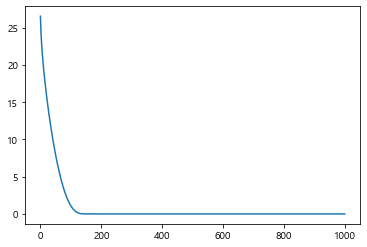

In [33]:
# 데이터준비
x_train = np.array([1,2,3,4,5])
y_train = np.array([2.1,3.1,4.1,5.1,6.1])

model = Sequential()
model.add(Dense(1, input_shape=(1,)))
#model.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy'])
#model.compile(loss='mse',optimizer='rmsprop',metrics=['mae'])
model.compile(loss='mse',optimizer=RMSprop(lr=0.01),metrics=['mae'])


model.summary()


model_result = model.fit(x_train,y_train,epochs=1000)
plt.plot(model_result.history['loss'])

model.predict(x_train)
model.predict(np.array([27,2.5,3.7]))

### 다중선형회귀

In [34]:
# matrix로 처리하는 경우
x_data = [[73., 80., 75.], [93., 88., 93.],
         [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]]

y_data = [[152.], [185.], [180.], [196.], [142.]]


X=tf.placeholder(tf.float32,shape=[None,3])
y=tf.placeholder(tf.float32,shape=[None,1])




# 가설준비
W = tf.Variable(tf.random_normal([3,1])) 
b = tf.Variable(tf.random_normal([1])) 

hypot = tf.matmul(X,W) + b 



# 비용함수
cost = tf.reduce_mean(tf.square(hypot-y)) 



#최소비용계산
train=tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)




with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        _,h,c = sess.run([train,hypot,cost],feed_dict={X:x_data,
                                                      y:y_data})
        
        if step % 100 == 0 :
            print(step,h,c)

0 [[-343.3211 ]
 [-419.34048]
 [-409.75403]
 [-443.6395 ]
 [-324.06003]] 316946.2
100 [[156.02213]
 [181.15445]
 [181.75734]
 [200.51074]
 [134.03883]] 23.556192
200 [[155.85692]
 [181.26868]
 [181.70795]
 [200.46564]
 [134.19666]] 22.509954
300 [[155.6962 ]
 [181.3798 ]
 [181.65988]
 [200.42152]
 [134.35036]] 21.51796
400 [[155.53989]
 [181.48788]
 [181.61319]
 [200.37842]
 [134.50009]] 20.57746
500 [[155.38786]
 [181.59305]
 [181.56781]
 [200.33627]
 [134.64594]] 19.6857
600 [[155.24   ]
 [181.69534]
 [181.52371]
 [200.29509]
 [134.78802]] 18.840094
700 [[155.0962 ]
 [181.79488]
 [181.48083]
 [200.25482]
 [134.92644]] 18.038197
800 [[154.95634]
 [181.89166]
 [181.43915]
 [200.21544]
 [135.06126]] 17.277773
900 [[154.82033]
 [181.98584]
 [181.39867]
 [200.17694]
 [135.19263]] 16.556568
1000 [[154.68806]
 [182.07745]
 [181.35933]
 [200.1393 ]
 [135.32062]] 15.872534
1100 [[154.55942]
 [182.16656]
 [181.32109]
 [200.10248]
 [135.44528]] 15.223783
1200 [[154.43433]
 [182.25325]
 [181.283

In [37]:
X = np.array([[73., 80., 75.], [93., 88., 93.],
         [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]])

y = np.array([[152.], [185.], [180.], [196.], [142.]])



model = Sequential([Dense(1,input_shape=(3,))])

model.compile(loss='mse',optimizer=RMSprop(lr=0.01))

model.fit(X,y,epochs=1000,batch_size=1)

model.predict(X)



Epoch 1/1000
5/5 [==============================] - 0s 20ms/step - loss: 813.7334
Epoch 2/1000
5/5 [==============================] - 0s 598us/step - loss: 175.1028
Epoch 3/1000
5/5 [==============================] - 0s 594us/step - loss: 38.7488
Epoch 4/1000
5/5 [==============================] - 0s 599us/step - loss: 10.8347
Epoch 5/1000
5/5 [==============================] - 0s 613us/step - loss: 9.1115
Epoch 6/1000
5/5 [==============================] - 0s 584us/step - loss: 9.5500
Epoch 7/1000
5/5 [==============================] - 0s 598us/step - loss: 10.2161
Epoch 8/1000
5/5 [==============================] - 0s 598us/step - loss: 11.4341
Epoch 9/1000
5/5 [==============================] - 0s 598us/step - loss: 12.9396
Epoch 10/1000
5/5 [==============================] - 0s 598us/step - loss: 11.2393
Epoch 11/1000
5/5 [==============================] - 0s 598us/step - loss: 11.0620
Epoch 12/1000
5/5 [==============================] - 0s 835us/step - loss: 15.1269
Epoch 13/1000


5/5 [==============================] - 0s 793us/step - loss: 10.0191
Epoch 199/1000
5/5 [==============================] - 0s 598us/step - loss: 5.6182
Epoch 200/1000
5/5 [==============================] - 0s 797us/step - loss: 6.5025
Epoch 201/1000
5/5 [==============================] - 0s 811us/step - loss: 5.5402
Epoch 202/1000
5/5 [==============================] - 0s 611us/step - loss: 11.4933
Epoch 203/1000
5/5 [==============================] - 0s 598us/step - loss: 8.1757
Epoch 204/1000
5/5 [==============================] - 0s 810us/step - loss: 5.0761
Epoch 205/1000
5/5 [==============================] - 0s 786us/step - loss: 7.2396
Epoch 206/1000
5/5 [==============================] - 0s 798us/step - loss: 9.0643
Epoch 207/1000
5/5 [==============================] - 0s 798us/step - loss: 5.5208
Epoch 208/1000
5/5 [==============================] - 0s 800us/step - loss: 4.7772
Epoch 209/1000
5/5 [==============================] - 0s 839us/step - loss: 7.4694
Epoch 210/1000
5/

5/5 [==============================] - 0s 595us/step - loss: 8.2201
Epoch 395/1000
5/5 [==============================] - 0s 807us/step - loss: 3.1563
Epoch 396/1000
5/5 [==============================] - 0s 590us/step - loss: 3.5078
Epoch 397/1000
5/5 [==============================] - 0s 598us/step - loss: 1.8685
Epoch 398/1000
5/5 [==============================] - 0s 611us/step - loss: 3.6975
Epoch 399/1000
5/5 [==============================] - 0s 795us/step - loss: 4.5014
Epoch 400/1000
5/5 [==============================] - 0s 719us/step - loss: 5.1680
Epoch 401/1000
5/5 [==============================] - 0s 599us/step - loss: 4.0416
Epoch 402/1000
5/5 [==============================] - 0s 599us/step - loss: 6.0576
Epoch 403/1000
5/5 [==============================] - 0s 828us/step - loss: 2.0263
Epoch 404/1000
5/5 [==============================] - 0s 798us/step - loss: 5.6331
Epoch 405/1000
5/5 [==============================] - 0s 598us/step - loss: 4.0749
Epoch 406/1000
5/5 

5/5 [==============================] - 0s 790us/step - loss: 1.7314
Epoch 591/1000
5/5 [==============================] - 0s 597us/step - loss: 3.3354
Epoch 592/1000
5/5 [==============================] - 0s 610us/step - loss: 1.2660
Epoch 593/1000
5/5 [==============================] - 0s 598us/step - loss: 0.9413
Epoch 594/1000
5/5 [==============================] - 0s 798us/step - loss: 2.7640
Epoch 595/1000
5/5 [==============================] - 0s 586us/step - loss: 5.7124
Epoch 596/1000
5/5 [==============================] - 0s 832us/step - loss: 3.1804
Epoch 597/1000
5/5 [==============================] - 0s 599us/step - loss: 4.4619
Epoch 598/1000
5/5 [==============================] - 0s 810us/step - loss: 1.5647
Epoch 599/1000
5/5 [==============================] - 0s 799us/step - loss: 1.5785
Epoch 600/1000
5/5 [==============================] - 0s 599us/step - loss: 3.8803
Epoch 601/1000
5/5 [==============================] - 0s 587us/step - loss: 3.3972
Epoch 602/1000
5/5 

5/5 [==============================] - 0s 798us/step - loss: 2.9071
Epoch 787/1000
5/5 [==============================] - 0s 798us/step - loss: 4.4092
Epoch 788/1000
5/5 [==============================] - 0s 810us/step - loss: 0.9371
Epoch 789/1000
5/5 [==============================] - 0s 598us/step - loss: 4.1719
Epoch 790/1000
5/5 [==============================] - 0s 598us/step - loss: 2.7778
Epoch 791/1000
5/5 [==============================] - 0s 595us/step - loss: 3.0421
Epoch 792/1000
5/5 [==============================] - 0s 801us/step - loss: 2.4352
Epoch 793/1000
5/5 [==============================] - 0s 786us/step - loss: 1.0836
Epoch 794/1000
5/5 [==============================] - 0s 811us/step - loss: 1.1415
Epoch 795/1000
5/5 [==============================] - 0s 712us/step - loss: 1.8083
Epoch 796/1000
5/5 [==============================] - 0s 807us/step - loss: 5.9499
Epoch 797/1000
5/5 [==============================] - 0s 604us/step - loss: 1.7177
Epoch 798/1000
5/5 

5/5 [==============================] - 0s 400us/step - loss: 2.9643
Epoch 983/1000
5/5 [==============================] - 0s 598us/step - loss: 2.0100
Epoch 984/1000
5/5 [==============================] - 0s 598us/step - loss: 0.8494
Epoch 985/1000
5/5 [==============================] - 0s 598us/step - loss: 2.0941
Epoch 986/1000
5/5 [==============================] - 0s 399us/step - loss: 5.6144
Epoch 987/1000
5/5 [==============================] - 0s 598us/step - loss: 0.8836
Epoch 988/1000
5/5 [==============================] - 0s 399us/step - loss: 1.4351
Epoch 989/1000
5/5 [==============================] - 0s 399us/step - loss: 1.8358
Epoch 990/1000
5/5 [==============================] - 0s 598us/step - loss: 1.6598
Epoch 991/1000
5/5 [==============================] - 0s 598us/step - loss: 5.4154
Epoch 992/1000
5/5 [==============================] - 0s 399us/step - loss: 1.9225
Epoch 993/1000
5/5 [==============================] - 0s 598us/step - loss: 1.8300
Epoch 994/1000
5/5 

array([[148.90782],
       [182.12653],
       [177.55785],
       [194.04091],
       [139.61006]], dtype=float32)

#### 혈당수치예측

In [39]:
data = np.genfromtxt('data/x09.txt',skip_header=36)   # 파일불러오기
                                                      # 처음 36줄은 스킵하고 가져오기
data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

Epoch 1/400
25/25 [==============================] - 0s 4ms/step - loss: 126864.2891
Epoch 2/400
25/25 [==============================] - 0s 40us/step - loss: 124408.7969
Epoch 3/400
25/25 [==============================] - 0s 40us/step - loss: 122650.9922
Epoch 4/400
25/25 [==============================] - 0s 40us/step - loss: 121193.0938
Epoch 5/400
25/25 [==============================] - 0s 40us/step - loss: 119909.1016
Epoch 6/400
25/25 [==============================] - 0s 40us/step - loss: 118740.6172
Epoch 7/400
25/25 [==============================] - 0s 40us/step - loss: 117655.1484
Epoch 8/400
25/25 [==============================] - 0s 40us/step - loss: 116632.5078
Epoch 9/400
25/25 [==============================] - 0s 40us/step - loss: 115659.1562
Epoch 10/400
25/25 [==============================] - 0s 40us/step - loss: 114725.6016
Epoch 11/400
25/25 [==============================] - 0s 36us/step - loss: 113824.7969
Epoch 12/400
25/25 [==============================] -

Epoch 97/400
25/25 [==============================] - 0s 40us/step - loss: 59857.0391
Epoch 98/400
25/25 [==============================] - 0s 0us/step - loss: 59348.1367
Epoch 99/400
25/25 [==============================] - 0s 41us/step - loss: 58841.5703
Epoch 100/400
25/25 [==============================] - 0s 40us/step - loss: 58337.3438
Epoch 101/400
25/25 [==============================] - 0s 0us/step - loss: 57835.4609
Epoch 102/400
25/25 [==============================] - 0s 40us/step - loss: 57335.9219
Epoch 103/400
25/25 [==============================] - 0s 40us/step - loss: 56838.7109
Epoch 104/400
25/25 [==============================] - 0s 41us/step - loss: 56343.8516
Epoch 105/400
25/25 [==============================] - 0s 39us/step - loss: 55851.3203
Epoch 106/400
25/25 [==============================] - 0s 42us/step - loss: 55361.1406
Epoch 107/400
25/25 [==============================] - 0s 39us/step - loss: 54873.2969
Epoch 108/400
25/25 [===========================

Epoch 192/400
25/25 [==============================] - 0s 40us/step - loss: 21886.2051
Epoch 193/400
25/25 [==============================] - 0s 40us/step - loss: 21596.9473
Epoch 194/400
25/25 [==============================] - 0s 38us/step - loss: 21309.9609
Epoch 195/400
25/25 [==============================] - 0s 0us/step - loss: 21025.2422
Epoch 196/400
25/25 [==============================] - 0s 0us/step - loss: 20742.7871
Epoch 197/400
25/25 [==============================] - 0s 0us/step - loss: 20462.6055
Epoch 198/400
25/25 [==============================] - 0s 40us/step - loss: 20184.6855
Epoch 199/400
25/25 [==============================] - 0s 40us/step - loss: 19909.0293
Epoch 200/400
25/25 [==============================] - 0s 40us/step - loss: 19635.6367
Epoch 201/400
25/25 [==============================] - 0s 39us/step - loss: 19364.5000
Epoch 202/400
25/25 [==============================] - 0s 0us/step - loss: 19095.6309
Epoch 203/400
25/25 [==========================

Epoch 287/400
25/25 [==============================] - 0s 0us/step - loss: 4280.8398
Epoch 288/400
25/25 [==============================] - 0s 40us/step - loss: 4197.0620
Epoch 289/400
25/25 [==============================] - 0s 80us/step - loss: 4115.2329
Epoch 290/400
25/25 [==============================] - 0s 42us/step - loss: 4035.3501
Epoch 291/400
25/25 [==============================] - 0s 0us/step - loss: 3957.3997
Epoch 292/400
25/25 [==============================] - 0s 0us/step - loss: 3881.3770
Epoch 293/400
25/25 [==============================] - 0s 0us/step - loss: 3807.2659
Epoch 294/400
25/25 [==============================] - 0s 0us/step - loss: 3735.0613
Epoch 295/400
25/25 [==============================] - 0s 41us/step - loss: 3664.7500
Epoch 296/400
25/25 [==============================] - 0s 41us/step - loss: 3596.3252
Epoch 297/400
25/25 [==============================] - 0s 38us/step - loss: 3529.7722
Epoch 298/400
25/25 [==============================] - 0s 4

Epoch 383/400
25/25 [==============================] - 0s 0us/step - loss: 2068.5525
Epoch 384/400
25/25 [==============================] - 0s 38us/step - loss: 2065.4314
Epoch 385/400
25/25 [==============================] - 0s 42us/step - loss: 2062.3074
Epoch 386/400
25/25 [==============================] - 0s 38us/step - loss: 2059.1829
Epoch 387/400
25/25 [==============================] - 0s 39us/step - loss: 2056.0608
Epoch 388/400
25/25 [==============================] - 0s 42us/step - loss: 2052.9453
Epoch 389/400
25/25 [==============================] - 0s 40us/step - loss: 2049.8367
Epoch 390/400
25/25 [==============================] - 0s 38us/step - loss: 2046.7377
Epoch 391/400
25/25 [==============================] - 0s 40us/step - loss: 2043.6520
Epoch 392/400
25/25 [==============================] - 0s 38us/step - loss: 2040.5808
Epoch 393/400
25/25 [==============================] - 0s 43us/step - loss: 2037.5261
Epoch 394/400
25/25 [==============================] - 

array([[369.1866]], dtype=float32)

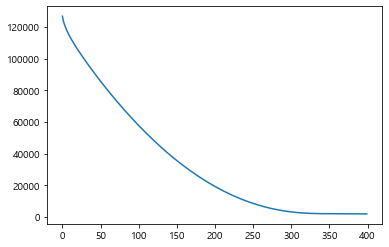

In [48]:
# 체중이 100이고 나이가 40일 때 혈당은?


# 데이터가져오기
X = data[:,2:4]     # 모든 행, 2번째열과 3번째열
y = data[:,4]       # 모든 행, 마지막열
y


model = Sequential([Dense(1,input_shape=(2,))])         # 1 = 출력의 갯수, 2 = 입력갯수

model.compile(loss='mse',optimizer=RMSprop(lr=0.01))

hist = model.fit(X,y,epochs=400)                        # 4000 번 돌려서 학습

plt.plot(hist.history['loss'])                          # 학습되는 것을 그래프로 그려보기


#예측
model.predict(np.array([100,40]).reshape(1,2))          # reshape(1,2) ->  np([100,40])이 일차원이니까 1행 2열로 reshape

 #### 보스턴 주택 가격 예측

In [50]:
from keras.datasets import boston_housing

(X_train,y_train),(X_test,y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 7us/step


In [52]:
print(X_train.shape,X_test.shape)
print(y_train[0:10])

(404, 13) (102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


In [54]:
X_train[0:5]

# 정규화
mean = X_train.mean(axis=0)  # 전체데이터 평균
X_train -= mean   # 각 데이터에서 평균빼기
std = X_train.std(axis=0)    # 표준편차 구하기
X_train /= std     # X_train을 표준편차로 나누기  

X_test -=mean
X_test /= std


# 정규화 한 후 확인
X_train[0:5]

array([[-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
        -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
         1.14850044,  0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, -0.25683275, -1.21518188,
         1.89434613, -1.91036058,  1.24758524, -0.85646254, -0.34843254,
        -1.71818909,  0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , -0.25683275,  0.62864202,
        -1.82968811,  1.11048828, -1.18743907,  1.67588577,  1.5652875 ,
         0.78447637,  0.22061726, -1.30850006],
       [-0.40149354, -0.48361547, -0.86940196, -0.25683275, -0.3615597 ,
        -0.3245576 , -1.23667187,  1.10717989, -0.51114231, -1.094663  ,
         0.78447637,  0.44807713, -0.65292624],
       [-0.0056343 , -0.48361547,  1.0283258 , -0.25683275,  1.32861221,
         0.15364225,  0.69480801, -0.57857203,  1.67588577,  1.5652875 ,
         0.78447637,  0.3898823 ,  0.26349695]])

In [58]:
# 히든계층만들어서 하기   (3개의 히든계층)

model = Sequential()
model.add(Dense(64,input_shape=(X_train.shape[1],),activation='relu'))# 64개 출력
model.add(Dense(64,activation='relu'))    # 2번째부터 입력갯수는 쓰지 않아도 된다. 앞에서 64개 출력이기 
                        # 때문에 64개를 자동적으로 입력받는다.
                  
                    # activation  -> 활성화 함수
model.add(Dense(1))


model.summary()

model.compile(loss='mse',optimizer ='rmsprop',metrics=['mae'])
model.fit(X_train,y_train,epochs=300,batch_size=1)


Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_30 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
404/404 [==============================] - 0s 994us/step - loss: 162.5965 - mae: 9.1486
Epoch 2/300
404/404 [==============================] - 0s 711us/step - loss: 23.5927 - mae: 3.3633
Epoch 3/300
404/404 [==============================] - 0s 679us/step - loss: 17.6579 - mae: 2.8068
Epoch 4/300
404/404 [==============================] - 0s 668us/step - loss: 15.227

404/404 [==============================] - 0s 712us/step - loss: 2.9470 - mae: 1.1732
Epoch 158/300
404/404 [==============================] - 0s 709us/step - loss: 2.7949 - mae: 1.1361
Epoch 159/300
404/404 [==============================] - 0s 714us/step - loss: 3.1213 - mae: 1.1418
Epoch 160/300
404/404 [==============================] - 0s 716us/step - loss: 2.6843 - mae: 1.1349
Epoch 161/300
404/404 [==============================] - 0s 712us/step - loss: 3.1167 - mae: 1.1613
Epoch 162/300
404/404 [==============================] - 0s 713us/step - loss: 3.0408 - mae: 1.1420
Epoch 163/300
404/404 [==============================] - 0s 715us/step - loss: 2.9455 - mae: 1.1725
Epoch 164/300
404/404 [==============================] - 0s 707us/step - loss: 2.6269 - mae: 1.1279
Epoch 165/300
404/404 [==============================] - 0s 706us/step - loss: 2.7950 - mae: 1.1763
Epoch 166/300
404/404 [==============================] - 0s 711us/step - loss: 2.8204 - mae: 1.1594
Epoch 167/300


In [59]:
# 평가 
mse,mae = model.evaluate(X_test,y_test)
print(mse,mae)

102/102 [==============================] - 0s 498us/step
12.823137769512101 2.578920602798462


#### 2진분류(OR gate)

In [61]:
X = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1],[1, 0, 0],[1, 1, 0],[1, 0, 1], [1, 1, 1]], dtype=np.float32)
y = np.array([[0],[1],[1],[1],[1],[1],[1],[1]], dtype=np.float32)



model = Sequential([Dense(units=1,input_shape=(3,),activation='sigmoid')])
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
# optimizer 도 여러종류가 있으니 사용해보자.  
    
    
model.fit(X,y,epochs=1000)

Epoch 1/1000
8/8 [==============================] - 0s 22ms/step - loss: 0.6848 - accuracy: 0.6250
Epoch 2/1000
8/8 [==============================] - 0s 369us/step - loss: 0.6816 - accuracy: 0.5000
Epoch 3/1000
8/8 [==============================] - 0s 39us/step - loss: 0.6793 - accuracy: 0.5000
Epoch 4/1000
8/8 [==============================] - 0s 125us/step - loss: 0.6774 - accuracy: 0.5000
Epoch 5/1000
8/8 [==============================] - 0s 123us/step - loss: 0.6757 - accuracy: 0.5000
Epoch 6/1000
8/8 [==============================] - 0s 115us/step - loss: 0.6742 - accuracy: 0.5000
Epoch 7/1000
8/8 [==============================] - 0s 125us/step - loss: 0.6728 - accuracy: 0.5000
Epoch 8/1000
8/8 [==============================] - 0s 136us/step - loss: 0.6714 - accuracy: 0.5000
Epoch 9/1000
8/8 [==============================] - 0s 122us/step - loss: 0.6701 - accuracy: 0.5000
Epoch 10/1000
8/8 [==============================] - 0s 133us/step - loss: 0.6689 - accuracy: 0.5000
E

Epoch 83/1000
8/8 [==============================] - 0s 125us/step - loss: 0.6002 - accuracy: 0.5000
Epoch 84/1000
8/8 [==============================] - 0s 125us/step - loss: 0.5993 - accuracy: 0.5000
Epoch 85/1000
8/8 [==============================] - 0s 125us/step - loss: 0.5985 - accuracy: 0.5000
Epoch 86/1000
8/8 [==============================] - 0s 125us/step - loss: 0.5976 - accuracy: 0.5000
Epoch 87/1000
8/8 [==============================] - 0s 0us/step - loss: 0.5967 - accuracy: 0.5000
Epoch 88/1000
8/8 [==============================] - 0s 125us/step - loss: 0.5959 - accuracy: 0.5000
Epoch 89/1000
8/8 [==============================] - 0s 125us/step - loss: 0.5950 - accuracy: 0.5000
Epoch 90/1000
8/8 [==============================] - 0s 125us/step - loss: 0.5942 - accuracy: 0.5000
Epoch 91/1000
8/8 [==============================] - 0s 125us/step - loss: 0.5933 - accuracy: 0.5000
Epoch 92/1000
8/8 [==============================] - 0s 125us/step - loss: 0.5925 - accuracy:

Epoch 164/1000
8/8 [==============================] - 0s 115us/step - loss: 0.5351 - accuracy: 0.6250
Epoch 165/1000
8/8 [==============================] - 0s 125us/step - loss: 0.5344 - accuracy: 0.6250
Epoch 166/1000
8/8 [==============================] - 0s 118us/step - loss: 0.5336 - accuracy: 0.6250
Epoch 167/1000
8/8 [==============================] - 0s 124us/step - loss: 0.5329 - accuracy: 0.6250
Epoch 168/1000
8/8 [==============================] - 0s 124us/step - loss: 0.5321 - accuracy: 0.6250
Epoch 169/1000
8/8 [==============================] - 0s 130us/step - loss: 0.5314 - accuracy: 0.7500
Epoch 170/1000
8/8 [==============================] - 0s 135us/step - loss: 0.5307 - accuracy: 0.7500
Epoch 171/1000
8/8 [==============================] - 0s 125us/step - loss: 0.5299 - accuracy: 0.7500
Epoch 172/1000
8/8 [==============================] - 0s 121us/step - loss: 0.5292 - accuracy: 0.7500
Epoch 173/1000
8/8 [==============================] - 0s 0us/step - loss: 0.5284 -

Epoch 245/1000
8/8 [==============================] - 0s 133us/step - loss: 0.4789 - accuracy: 0.7500
Epoch 246/1000
8/8 [==============================] - 0s 123us/step - loss: 0.4782 - accuracy: 0.7500
Epoch 247/1000
8/8 [==============================] - 0s 0us/step - loss: 0.4776 - accuracy: 0.7500
Epoch 248/1000
8/8 [==============================] - 0s 125us/step - loss: 0.4769 - accuracy: 0.7500
Epoch 249/1000
8/8 [==============================] - 0s 125us/step - loss: 0.4763 - accuracy: 0.7500
Epoch 250/1000
8/8 [==============================] - 0s 129us/step - loss: 0.4757 - accuracy: 0.7500
Epoch 251/1000
8/8 [==============================] - 0s 123us/step - loss: 0.4750 - accuracy: 0.7500
Epoch 252/1000
8/8 [==============================] - 0s 130us/step - loss: 0.4744 - accuracy: 0.7500
Epoch 253/1000
8/8 [==============================] - 0s 124us/step - loss: 0.4737 - accuracy: 0.7500
Epoch 254/1000
8/8 [==============================] - 0s 123us/step - loss: 0.4731 -

Epoch 326/1000
8/8 [==============================] - 0s 0us/step - loss: 0.4307 - accuracy: 0.7500
Epoch 327/1000
8/8 [==============================] - 0s 125us/step - loss: 0.4301 - accuracy: 0.7500
Epoch 328/1000
8/8 [==============================] - 0s 118us/step - loss: 0.4296 - accuracy: 0.7500
Epoch 329/1000
8/8 [==============================] - 0s 124us/step - loss: 0.4291 - accuracy: 0.7500
Epoch 330/1000
8/8 [==============================] - 0s 0us/step - loss: 0.4285 - accuracy: 0.7500
Epoch 331/1000
8/8 [==============================] - 0s 133us/step - loss: 0.4280 - accuracy: 0.7500
Epoch 332/1000
8/8 [==============================] - 0s 125us/step - loss: 0.4274 - accuracy: 0.7500
Epoch 333/1000
8/8 [==============================] - 0s 0us/step - loss: 0.4269 - accuracy: 0.7500
Epoch 334/1000
8/8 [==============================] - 0s 124us/step - loss: 0.4263 - accuracy: 0.7500
Epoch 335/1000
8/8 [==============================] - 0s 125us/step - loss: 0.4258 - acc

Epoch 407/1000
8/8 [==============================] - 0s 126us/step - loss: 0.3899 - accuracy: 0.7500
Epoch 408/1000
8/8 [==============================] - 0s 125us/step - loss: 0.3894 - accuracy: 0.7500
Epoch 409/1000
8/8 [==============================] - 0s 0us/step - loss: 0.3890 - accuracy: 0.7500
Epoch 410/1000
8/8 [==============================] - 0s 0us/step - loss: 0.3885 - accuracy: 0.7500
Epoch 411/1000
8/8 [==============================] - 0s 0us/step - loss: 0.3881 - accuracy: 0.7500
Epoch 412/1000
8/8 [==============================] - 0s 0us/step - loss: 0.3876 - accuracy: 0.7500
Epoch 413/1000
8/8 [==============================] - 0s 0us/step - loss: 0.3871 - accuracy: 0.7500
Epoch 414/1000
8/8 [==============================] - 0s 125us/step - loss: 0.3867 - accuracy: 0.7500
Epoch 415/1000
8/8 [==============================] - 0s 125us/step - loss: 0.3862 - accuracy: 0.7500
Epoch 416/1000
8/8 [==============================] - 0s 125us/step - loss: 0.3858 - accurac

Epoch 488/1000
8/8 [==============================] - 0s 0us/step - loss: 0.3557 - accuracy: 0.7500
Epoch 489/1000
8/8 [==============================] - 0s 120us/step - loss: 0.3553 - accuracy: 0.7500
Epoch 490/1000
8/8 [==============================] - 0s 125us/step - loss: 0.3549 - accuracy: 0.7500
Epoch 491/1000
8/8 [==============================] - 0s 253us/step - loss: 0.3545 - accuracy: 0.7500
Epoch 492/1000
8/8 [==============================] - 0s 113us/step - loss: 0.3542 - accuracy: 0.7500
Epoch 493/1000
8/8 [==============================] - 0s 0us/step - loss: 0.3538 - accuracy: 0.7500
Epoch 494/1000
8/8 [==============================] - 0s 132us/step - loss: 0.3534 - accuracy: 0.7500
Epoch 495/1000
8/8 [==============================] - 0s 125us/step - loss: 0.3530 - accuracy: 0.7500
Epoch 496/1000
8/8 [==============================] - 0s 113us/step - loss: 0.3526 - accuracy: 0.7500
Epoch 497/1000
8/8 [==============================] - 0s 0us/step - loss: 0.3523 - acc

Epoch 569/1000
8/8 [==============================] - 0s 121us/step - loss: 0.3273 - accuracy: 0.7500
Epoch 570/1000
8/8 [==============================] - 0s 117us/step - loss: 0.3270 - accuracy: 0.7500
Epoch 571/1000
8/8 [==============================] - 0s 117us/step - loss: 0.3267 - accuracy: 0.7500
Epoch 572/1000
8/8 [==============================] - 0s 0us/step - loss: 0.3264 - accuracy: 0.7500
Epoch 573/1000
8/8 [==============================] - 0s 0us/step - loss: 0.3261 - accuracy: 0.7500
Epoch 574/1000
8/8 [==============================] - 0s 0us/step - loss: 0.3257 - accuracy: 0.7500
Epoch 575/1000
8/8 [==============================] - 0s 0us/step - loss: 0.3254 - accuracy: 0.7500
Epoch 576/1000
8/8 [==============================] - 0s 125us/step - loss: 0.3251 - accuracy: 0.7500
Epoch 577/1000
8/8 [==============================] - 0s 121us/step - loss: 0.3248 - accuracy: 0.7500
Epoch 578/1000
8/8 [==============================] - 0s 117us/step - loss: 0.3245 - accur

Epoch 650/1000
8/8 [==============================] - 0s 119us/step - loss: 0.3041 - accuracy: 0.8750
Epoch 651/1000
8/8 [==============================] - 0s 131us/step - loss: 0.3038 - accuracy: 0.8750
Epoch 652/1000
8/8 [==============================] - 0s 117us/step - loss: 0.3036 - accuracy: 0.8750
Epoch 653/1000
8/8 [==============================] - 0s 129us/step - loss: 0.3033 - accuracy: 0.8750
Epoch 654/1000
8/8 [==============================] - 0s 125us/step - loss: 0.3031 - accuracy: 0.8750
Epoch 655/1000
8/8 [==============================] - 0s 126us/step - loss: 0.3028 - accuracy: 0.8750
Epoch 656/1000
8/8 [==============================] - 0s 0us/step - loss: 0.3025 - accuracy: 0.8750
Epoch 657/1000
8/8 [==============================] - 0s 124us/step - loss: 0.3023 - accuracy: 0.8750
Epoch 658/1000
8/8 [==============================] - 0s 126us/step - loss: 0.3020 - accuracy: 0.8750
Epoch 659/1000
8/8 [==============================] - 0s 117us/step - loss: 0.3018 -

Epoch 731/1000
8/8 [==============================] - 0s 119us/step - loss: 0.2853 - accuracy: 0.8750
Epoch 732/1000
8/8 [==============================] - 0s 125us/step - loss: 0.2851 - accuracy: 0.8750
Epoch 733/1000
8/8 [==============================] - 0s 128us/step - loss: 0.2849 - accuracy: 0.8750
Epoch 734/1000
8/8 [==============================] - 0s 120us/step - loss: 0.2847 - accuracy: 0.8750
Epoch 735/1000
8/8 [==============================] - 0s 117us/step - loss: 0.2845 - accuracy: 0.8750
Epoch 736/1000
8/8 [==============================] - 0s 0us/step - loss: 0.2843 - accuracy: 0.8750
Epoch 737/1000
8/8 [==============================] - 0s 119us/step - loss: 0.2841 - accuracy: 0.8750
Epoch 738/1000
8/8 [==============================] - 0s 0us/step - loss: 0.2839 - accuracy: 0.8750
Epoch 739/1000
8/8 [==============================] - 0s 0us/step - loss: 0.2837 - accuracy: 0.8750
Epoch 740/1000
8/8 [==============================] - 0s 0us/step - loss: 0.2835 - accur

Epoch 812/1000
8/8 [==============================] - 0s 125us/step - loss: 0.2704 - accuracy: 0.8750
Epoch 813/1000
8/8 [==============================] - 0s 128us/step - loss: 0.2702 - accuracy: 0.8750
Epoch 814/1000
8/8 [==============================] - 0s 123us/step - loss: 0.2700 - accuracy: 0.8750
Epoch 815/1000
8/8 [==============================] - 0s 131us/step - loss: 0.2699 - accuracy: 0.8750
Epoch 816/1000
8/8 [==============================] - 0s 125us/step - loss: 0.2697 - accuracy: 0.8750
Epoch 817/1000
8/8 [==============================] - 0s 0us/step - loss: 0.2695 - accuracy: 0.8750
Epoch 818/1000
8/8 [==============================] - 0s 128us/step - loss: 0.2694 - accuracy: 0.8750
Epoch 819/1000
8/8 [==============================] - 0s 127us/step - loss: 0.2692 - accuracy: 0.8750
Epoch 820/1000
8/8 [==============================] - 0s 124us/step - loss: 0.2691 - accuracy: 0.8750
Epoch 821/1000
8/8 [==============================] - 0s 130us/step - loss: 0.2689 -

Epoch 893/1000
8/8 [==============================] - 0s 0us/step - loss: 0.2587 - accuracy: 0.8750
Epoch 894/1000
8/8 [==============================] - 0s 129us/step - loss: 0.2586 - accuracy: 0.8750
Epoch 895/1000
8/8 [==============================] - 0s 125us/step - loss: 0.2584 - accuracy: 0.8750
Epoch 896/1000
8/8 [==============================] - 0s 124us/step - loss: 0.2583 - accuracy: 0.8750
Epoch 897/1000
8/8 [==============================] - 0s 0us/step - loss: 0.2582 - accuracy: 0.8750
Epoch 898/1000
8/8 [==============================] - 0s 129us/step - loss: 0.2581 - accuracy: 0.8750
Epoch 899/1000
8/8 [==============================] - 0s 126us/step - loss: 0.2579 - accuracy: 0.8750
Epoch 900/1000
8/8 [==============================] - 0s 0us/step - loss: 0.2578 - accuracy: 0.8750
Epoch 901/1000
8/8 [==============================] - 0s 0us/step - loss: 0.2577 - accuracy: 0.8750
Epoch 902/1000
8/8 [==============================] - 0s 122us/step - loss: 0.2576 - accur

Epoch 974/1000
8/8 [==============================] - 0s 0us/step - loss: 0.2492 - accuracy: 0.8750
Epoch 975/1000
8/8 [==============================] - 0s 127us/step - loss: 0.2491 - accuracy: 0.8750
Epoch 976/1000
8/8 [==============================] - 0s 117us/step - loss: 0.2490 - accuracy: 0.8750
Epoch 977/1000
8/8 [==============================] - 0s 122us/step - loss: 0.2488 - accuracy: 0.8750
Epoch 978/1000
8/8 [==============================] - 0s 125us/step - loss: 0.2487 - accuracy: 0.8750
Epoch 979/1000
8/8 [==============================] - 0s 133us/step - loss: 0.2486 - accuracy: 0.8750
Epoch 980/1000
8/8 [==============================] - 0s 125us/step - loss: 0.2485 - accuracy: 0.8750
Epoch 981/1000
8/8 [==============================] - 0s 118us/step - loss: 0.2484 - accuracy: 0.8750
Epoch 982/1000
8/8 [==============================] - 0s 126us/step - loss: 0.2483 - accuracy: 0.8750
Epoch 983/1000
8/8 [==============================] - 0s 117us/step - loss: 0.2482 -

In [62]:
model.predict(X)

array([[0.69463134],
       [0.9373379 ],
       [0.6473281 ],
       [0.92349017],
       [0.92414176],
       [0.90766513],
       [0.9876714 ],
       [0.9847661 ]], dtype=float32)

#### MNIST 손글씨 사례

In [81]:
from keras.datasets import mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [82]:
print(X_train.shape,X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [83]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [84]:
# one-hot enconding

y_train = np_utils.to_categorical(y_train)    # np_utils.to_categorical 원핫인코딩을 해준다.
y_test = np_utils.to_categorical(y_test) 

In [85]:
y_test[0:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [86]:
# 이미지 데이터 스케일 조정
X_train = X_train.reshape(60000,28*28).astype('float32') / 255
X_test = X_test.reshape(10000,28*28).astype('float32') / 255

In [87]:
# validation 분할


x_val = X_train[:12600]
X_train = X_train[12600:]
y_val = y_train[:12600]
y_train = y_train[12600:]

In [88]:
# 모델구성
model= Sequential()
model.add(Dense(units=64,input_shape=(28*28,),activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_44 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [89]:
model.fit(X_train,y_train,epochs=5,batch_size=32,validation_data=(x_val,y_val))


Train on 47400 samples, validate on 12600 samples
Epoch 1/5
47400/47400 [==============================] - 2s 44us/step - loss: 0.7489 - accuracy: 0.8109 - val_loss: 0.4056 - val_accuracy: 0.8919
Epoch 2/5
47400/47400 [==============================] - 2s 40us/step - loss: 0.3727 - accuracy: 0.8954 - val_loss: 0.3314 - val_accuracy: 0.9070
Epoch 3/5
47400/47400 [==============================] - 2s 38us/step - loss: 0.3195 - accuracy: 0.9101 - val_loss: 0.2958 - val_accuracy: 0.9158
Epoch 4/5
47400/47400 [==============================] - 2s 39us/step - loss: 0.2889 - accuracy: 0.9181 - val_loss: 0.2721 - val_accuracy: 0.9234
Epoch 5/5
47400/47400 [==============================] - 2s 37us/step - loss: 0.2655 - accuracy: 0.9255 - val_loss: 0.2572 - val_accuracy: 0.9261


In [90]:
result = model.evaluate(X_test,y_test,batch_size= 32)
print(result)

10000/10000 [==============================] - 0s 19us/step
[0.2488456995457411, 0.9294000267982483]


In [91]:
np.random.seed(7)

xhat_idx = np.random.choice(X_test.shape[0],10)         # 10장을 임의로 추출
xhat_idx

array([9412,  537, 5699, 4307,  919, 1372, 7566, 2583, 4441, 3239])

In [92]:
xhat = X_test[xhat_idx]
xhat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [94]:
yhat = model.predict_classes(xhat)
yhat

array([4, 1, 1, 5, 2, 2, 0, 3, 6, 2], dtype=int64)

In [95]:
for i in range(10):
    print('True: ', np.argmax(y_test[xhat_idx[i]]),'predict:',yhat[i])

True:  4 predict: 4
True:  1 predict: 1
True:  1 predict: 1
True:  5 predict: 5
True:  2 predict: 2
True:  2 predict: 2
True:  0 predict: 0
True:  3 predict: 3
True:  6 predict: 6
True:  2 predict: 2


#### 텐서보드 작성

In [102]:
from keras.datasets import mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()


# one-hot enconding
y_train = np_utils.to_categorical(y_train)    # np_utils.to_categorical 원핫인코딩을 해준다.
y_test = np_utils.to_categorical(y_test) 


# 이미지 데이터 스케일 조정
X_train = X_train.reshape(60000,28*28).astype('float32') / 255
X_test = X_test.reshape(10000,28*28).astype('float32') / 255


# validation 분할
x_val = X_train[:12600]
X_train = X_train[12600:]
y_val = y_train[:12600]
y_train = y_train[12600:]


# 모델구성
model= Sequential()
model.add(Dense(units=64,input_shape=(28*28,),activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])



# 텐서보드 설정       # callback : 알아서 훈련하면서 재호출시킴.
tf_hist = keras.callbacks.TensorBoard(log_dir='./graph',write_graph=True,write_images=True)                  
# cmd창가서 tensorboard --logdir=graph


# 조기종료설정
early = EarlyStopping()



# 훈련
model.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(x_val,y_val),callbacks=[tf_hist,early])

Train on 47400 samples, validate on 12600 samples
Epoch 1/50
47400/47400 [==============================] - 2s 47us/step - loss: 0.7346 - accuracy: 0.8189 - val_loss: 0.3991 - val_accuracy: 0.8948
Epoch 2/50
47400/47400 [==============================] - 2s 43us/step - loss: 0.3690 - accuracy: 0.8977 - val_loss: 0.3272 - val_accuracy: 0.9090
Epoch 3/50
47400/47400 [==============================] - 2s 44us/step - loss: 0.3171 - accuracy: 0.9113 - val_loss: 0.2915 - val_accuracy: 0.9187
Epoch 4/50
47400/47400 [==============================] - 2s 43us/step - loss: 0.2863 - accuracy: 0.9186 - val_loss: 0.2690 - val_accuracy: 0.9251
Epoch 5/50
47400/47400 [==============================] - 2s 43us/step - loss: 0.2639 - accuracy: 0.9253 - val_loss: 0.2526 - val_accuracy: 0.9285
Epoch 6/50
47400/47400 [==============================] - 2s 43us/step - loss: 0.2458 - accuracy: 0.9308 - val_loss: 0.2370 - val_accuracy: 0.9321
Epoch 7/50
47400/47400 [==============================] - 2s 44us/st

In [97]:
# 모델저장
model.save('data/mnist_model.h5')

In [100]:
# 모델불러오기
model2 = load_model('data/mnist_model.h5')


(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_test = X_test.reshape(10000,28*28).astype('float32') / 255
y_test = np_utils.to_categorical(y_test)


xhat_idx = np.random.choice(X_test.shape[0],10)
xhat = X_test[xhat_idx]
yhat = model2.predict_classes(xhat)




for i in range(10):
    print('True: ', np.argmax(y_test[xhat_idx[i]]),'predict:',yhat[i])

True:  1 predict: 1
True:  6 predict: 6
True:  1 predict: 1
True:  8 predict: 8
True:  7 predict: 2
True:  6 predict: 6
True:  4 predict: 4
True:  2 predict: 9
True:  7 predict: 7
True:  3 predict: 3


In [103]:
# 조기종료 : EarlyStopping(monitor = 'var_loss' , min_delta=0,patience =10 )
#                            monitor = 관찰하고자하는 항목, 주로 val_loss나 val_acc가 주로 사용
#                           min_delta = 개선되고 있다고 판단하기 위한 최소변화량, 디폴트값:0
#                           patience = 지정된 값까지 기다렸다가 종료          
# epochs=50 설정헀는데 33만 돌고 훈련을 더할 필요성이 없다고 느껴지면 50을 다 돌고 종료하는 
#  것이 아니라 일찍 종료한다. 

### DNN 모듈화

In [109]:
# def make_model(input_number,output_number,hidden_layer):
#     model = Sequential()
#     model.add(Dense(hidden_layer[0],input_shape=(input_number,),activation='relu'))
#     model.add(Dense(hidden_layer[1],activation='relu'))
#     model.add(Dense(hidden_layer[2],activation='relu'))
#     model.add(Dense(hidden_layer[3],activation='relu'))
    
    
#     model.add(keras.layers.core.Dropout(0.2))   # 0.2는 버리고 0.8 만 가지고 해라.
    
    
#     # 최종 출력계층
#     model.add(Dense(output_number,activation='softmax'))
#     model.add(Dense(loss ='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    
#     return model
              
              
              
def make_model(input_number, output_number, hidden_layer):  
    model = Sequential()
    
    model.add(Dense(hidden_layer[0], input_shape=(input_number,), activation='relu'))
    model.add(Dense(hidden_layer[1], activation='relu'))
    model.add(Dense(hidden_layer[2], activation='relu'))
    model.add(Dense(hidden_layer[3], activation='relu'))
    
    model.add(keras.layers.core.Dropout(0.2))
    
    model.add(Dense(output_number, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return model              

In [112]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

# ONE=HOT
y_train = np_utils.to_categorical(y_train)    # np_utils.to_categorical 원핫인코딩을 해준다.
y_test = np_utils.to_categorical(y_test) 

# 이미지스케일조정
X_train = X_train.reshape(60000,28*28).astype('float32') / 255
X_test = X_test.reshape(10000,28*28).astype('float32') / 255



# 파라미터
input_number = 784
output_number = 10
hidden_layer =[255,255,255,255]

model = make_model(input_number,output_number,hidden_layer)
model.fit(X_train,y_train,epochs=5,batch_size=100)

Epoch 1/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.2523 - accuracy: 0.9223
Epoch 2/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.0965 - accuracy: 0.9704
Epoch 3/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.0700 - accuracy: 0.9783
Epoch 4/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.0524 - accuracy: 0.9836
Epoch 5/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.0412 - accuracy: 0.9869


#### iris예제

In [4]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
X = iris.iloc[:,:4].values
y = iris.iloc[:,-1].values

X
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [10]:
from sklearn.preprocessing import LabelEncoder    # 인코더를 하기 위함

encoder = LabelEncoder()   
y1 = encoder.fit_transform(y)     # 품종을 각각 0,1,2로 인코딩
y1    

y2 = pd.get_dummies(y1).values    # 겟더미를 이용한 원핫인코딩
y2

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [11]:
from sklearn.model_selection import train_test_split   # 훈련용과 테스트용을 구별하기 위함

X_train,X_test,y_train,y_test = train_test_split(X,y2,test_size=0.2,random_state=1)

In [15]:
# 모델생성   

model = Sequential()
model.add(Dense(64,input_shape=(4,),activation='relu'))   # (첫번째계층)
                                      # Dense(출력객수,입력갯수)        # 출력갯수는 내 마음대로 적당히 지정하면 된다.
                                        # 입력갯수는 sepal_length, sepal_width, petal_length, petal_width 4개.
        
model.add(Dense(64,activation='relu'))         # 두번째 히든계층 . 입력갯수 64개는 생략
model.add(Dense(3,activation='softmax'))    # 최종출력계층     
                                            # 출력갯수 3개 이다.   setosa, versicolor, virginica
                                            # 입력갯수 64개는 생략.
        
        
        
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])        
# optimizer : 어떤 그라디언트를 쓸건지?

hist = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))


Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 814us/step - loss: 1.6322 - accuracy: 0.3083 - val_loss: 1.2393 - val_accuracy: 0.4333
Epoch 2/100
120/120 [==============================] - 0s 58us/step - loss: 1.2484 - accuracy: 0.3083 - val_loss: 1.1421 - val_accuracy: 0.4667
Epoch 3/100
120/120 [==============================] - 0s 42us/step - loss: 1.0880 - accuracy: 0.4083 - val_loss: 1.1551 - val_accuracy: 0.2000
Epoch 4/100
120/120 [==============================] - 0s 49us/step - loss: 1.0589 - accuracy: 0.3667 - val_loss: 1.1647 - val_accuracy: 0.2000
Epoch 5/100
120/120 [==============================] - 0s 41us/step - loss: 1.0304 - accuracy: 0.3750 - val_loss: 1.1228 - val_accuracy: 0.5667
Epoch 6/100
120/120 [==============================] - 0s 34us/step - loss: 0.9773 - accuracy: 0.6917 - val_loss: 1.0188 - val_accuracy: 0.5667
Epoch 7/100
120/120 [==============================] - 0s 41us/step - loss: 0.9172 - accu

Epoch 56/100
120/120 [==============================] - 0s 42us/step - loss: 0.1550 - accuracy: 0.9667 - val_loss: 0.1904 - val_accuracy: 1.0000
Epoch 57/100
120/120 [==============================] - 0s 33us/step - loss: 0.1515 - accuracy: 0.9667 - val_loss: 0.1941 - val_accuracy: 0.9667
Epoch 58/100
120/120 [==============================] - 0s 50us/step - loss: 0.1488 - accuracy: 0.9667 - val_loss: 0.1812 - val_accuracy: 1.0000
Epoch 59/100
120/120 [==============================] - 0s 43us/step - loss: 0.1464 - accuracy: 0.9833 - val_loss: 0.1701 - val_accuracy: 1.0000
Epoch 60/100
120/120 [==============================] - 0s 42us/step - loss: 0.1432 - accuracy: 0.9667 - val_loss: 0.1785 - val_accuracy: 1.0000
Epoch 61/100
120/120 [==============================] - 0s 41us/step - loss: 0.1381 - accuracy: 0.9667 - val_loss: 0.1719 - val_accuracy: 1.0000
Epoch 62/100
120/120 [==============================] - 0s 41us/step - loss: 0.1369 - accuracy: 0.9667 - val_loss: 0.1652 - val_ac

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


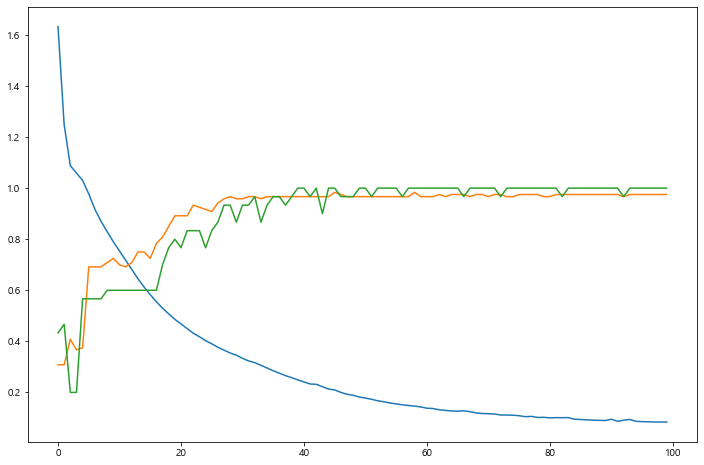

In [18]:
print(hist.history.keys())

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [19]:
# 평가
loss,acc = model.evaluate(X_test,y_test)
print(loss,acc)

30/30 [==============================] - 0s 34us/step
0.09101962298154831 1.0


In [26]:
from sklearn.metrics import classification_report,confusion_matrix   # 예측

y_pred= model.predict(X_test)


y_test_class = np.argmax(y_test,axis=1)   # 정답
y_pred_class = np.argmax(y_pred,axis=1)   # 예측값

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))



test_set = np.array([[5,2.9,1,0.2]])    # 무엇이라고 예측할까?   
print('품종예측: ' , iris['species'].unique()[model.predict_classes(test_set)])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
품종예측:  ['setosa']


### CNN


In [28]:
from keras.datasets import mnist
from keras import layers

In [38]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

# ONE=HOT
y_train = np_utils.to_categorical(y_train)    # np_utils.to_categorical 원핫인코딩을 해준다.
y_test = np_utils.to_categorical(y_test) 

# 이미지스케일조정
X_train = X_train.reshape(60000,28,28,1).astype('float32') / 255
X_test = X_test.reshape(10000,28,28,1).astype('float32') / 255


# 모델
model = Sequential()


# conv layer : 필터갯수는 32개, 크기는 3*3
model.add(layers.Conv2D(32,(3,3),activation ='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))


model.add(layers.Conv2D(64,(3,3),activation ='relu'))
model.add(layers.MaxPool2D((2,2)))


model.add(layers.Conv2D(64,(3,3),activation ='relu'))



# FC Layer
model.add(layers.Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5,batch_size=100)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)              

In [39]:
## 단아언니 # iris 예제





%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *
import seaborn as sns

from sklearn.datasets import load_iris
iris = load_iris()

print(iris.target_names)
# print(iris.DESCR)

# df로 데이터 살펴보기
iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
print(iris_df.count())
iris_df.head()

# 데이터 - 훈련용140, 테스트용10 나누기 
data_array = np.array(iris.data)


X_train, X_test = train_test_split(data_array, test_size = 0.3, random_state =123)


# 확인
X_train.shape, X_test.shape


# 정답 - 훈련용140, 테스트용10 나누기 
label_array = np.array(iris.target)
label_array

y_train, y_test = train_test_split(label_array, test_size = 0.3, random_state =123)

# one-hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 확인
print(y_train.shape, y_test.shape)
print(y_train[:5])

# hidden_layer
def make_hidden(model, input_number, output_number, activation):
    model.add(Dense(units = output_number, input_shape = (input_number,), activation = activation))
    
    return model


def make_final(model, output_number, final_output_number, optimizer):
    
    # 최종 출력계층
    model.add(Dense(units = final_output_number,input_shape = (output_number,), activation = "softmax"))
    model.compile(loss = "categorical_crossentropy", optimizer = optimizer,  metrics = ["accuracy"])
    
    return model


# 파라미터
input_number = 4
output_number = 64
final_output_number = 3


activation_list = ["relu", "sigmoid"]
activation = activation_list[0]
print(activation, type(activation))

optimizer_list = ["SGD", "adam", "rmsprop"]
optimizer = optimizer_list[0]
print(optiimizer, type(optiimizer))


# 모델 만들기
model = Sequential()

make_hidden(model, input_number, output_number, activation)
make_hidden(model, input_number, output_number, activation)
make_hidden(model, input_number, output_number, activation)
make_hidden(model, input_number, output_number, activation)

make_final(model, output_number, final_output_number, optimizer)

model.fit(X_train, y_train, epochs = 100)



['setosa' 'versicolor' 'virginica']
sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
dtype: int64
(105, 3) (45, 3)
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
relu <class 'str'>


NameError: name 'optiimizer' is not defined